<a href="https://colab.research.google.com/github/KandlapallyShivaTeja/CODSOFT-TASKS/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unique values in 'Embarked' before imputation: ['S' 'C' 'Q' nan]
Model Accuracy: 0.8156424581005587
Classification Report:               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179



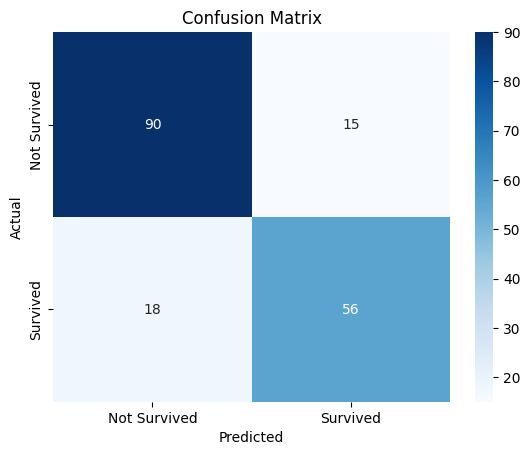

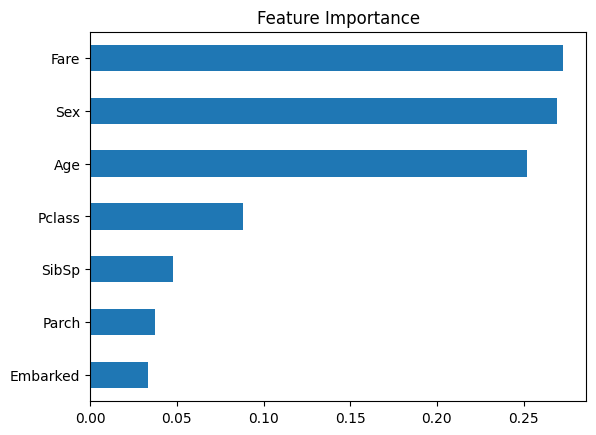

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
#
data_path = '/content/Titanic-Dataset.csv'
titanic_data = pd.read_csv(data_path)
#
titanic_data.drop('Cabin', axis=1, inplace=True)
#
age_imputer = SimpleImputer(strategy='median')
titanic_data['Age'] = age_imputer.fit_transform(titanic_data[['Age']])
#
titanic_data['Embarked'] = titanic_data['Embarked'].replace([None, 'NULL'], np.nan)
print("Unique values in 'Embarked' before imputation:", titanic_data['Embarked'].unique())
#
embarked_imputer = SimpleImputer(strategy='most_frequent')
titanic_data['Embarked'] = embarked_imputer.fit_transform(titanic_data[['Embarked']].values).flatten()
#
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
#
titanic_data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.show()